In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer, normalize

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial')
sys.path.append("/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial")
!pwd

/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial


In [4]:
df = pd.read_csv('./datasets/diabetes.csv')
df = df.drop(['Outcome'], axis=1)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
l2_normalized_df = pd.DataFrame(normalize(df, norm='l2'), columns=df.columns)

In [7]:
l2_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [8]:
l2_normalized_df.loc[0].pow(2)

Pregnancies                 0.001126
Glucose                     0.684963
BloodPressure               0.162110
SkinThickness               0.038307
Insulin                     0.000000
BMI                         0.035304
DiabetesPedigreeFunction    0.000012
Age                         0.078178
Name: 0, dtype: float64

In [9]:
math.sqrt(l2_normalized_df.loc[2].pow(2).sum())

1.0

In [10]:
l1_normalized_df = pd.DataFrame(normalize(df, norm='l1'), columns=df.columns)

In [11]:
l1_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.017380,0.428703,0.208558,0.101383,0.000000,0.097327,0.001816,0.144832
1,0.004185,0.355721,0.276207,0.121364,0.000000,0.111320,0.001469,0.129734
2,0.025726,0.588477,0.205806,0.000000,0.000000,0.074926,0.002161,0.102903
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [12]:
math.sqrt(l1_normalized_df.loc[2].abs().sum())

0.9999999999999999

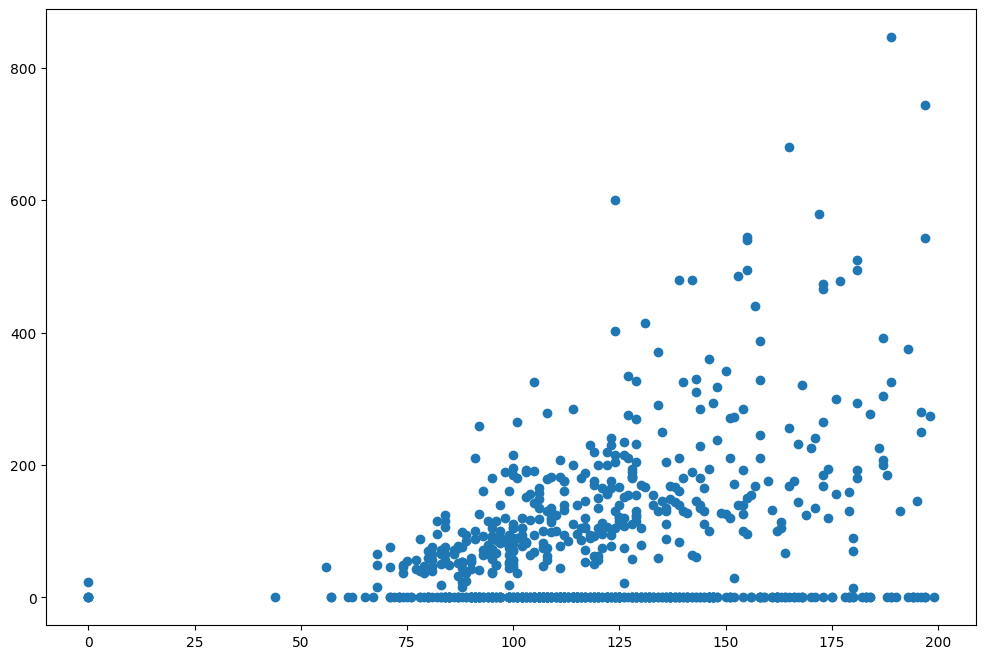

In [13]:
# it seems that there is a high correlation between Glucose and Insulin
fix, ax = plt.subplots(figsize=(12,8))
plt.scatter(df['Glucose'],df['Insulin'])
plt.show()

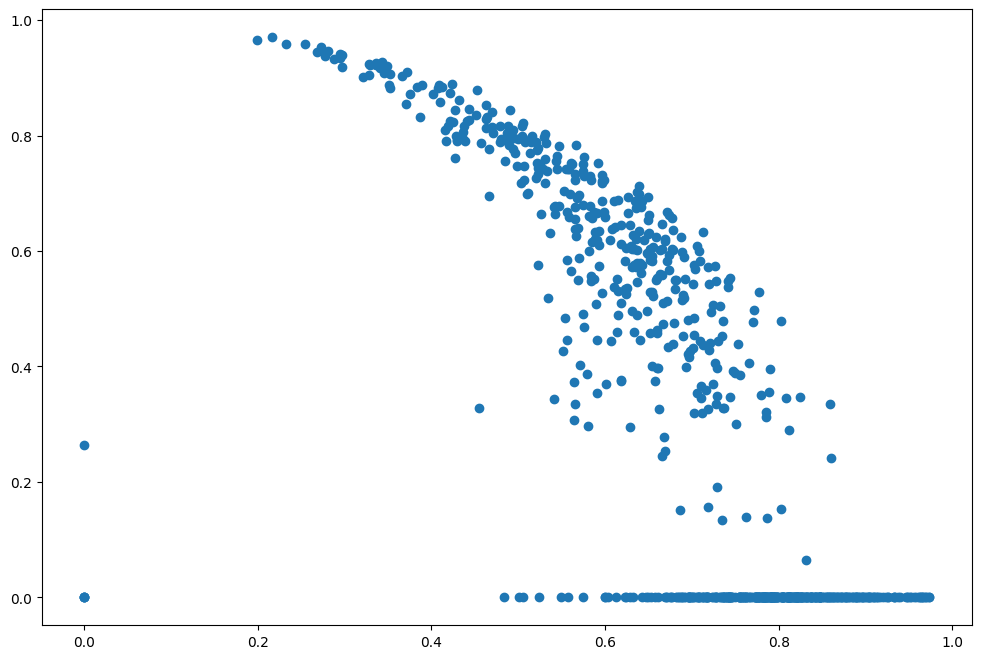

In [14]:
fix, ax = plt.subplots(figsize=(12,8))
plt.scatter(l2_normalized_df['Glucose'],l2_normalized_df['Insulin'])
plt.show()

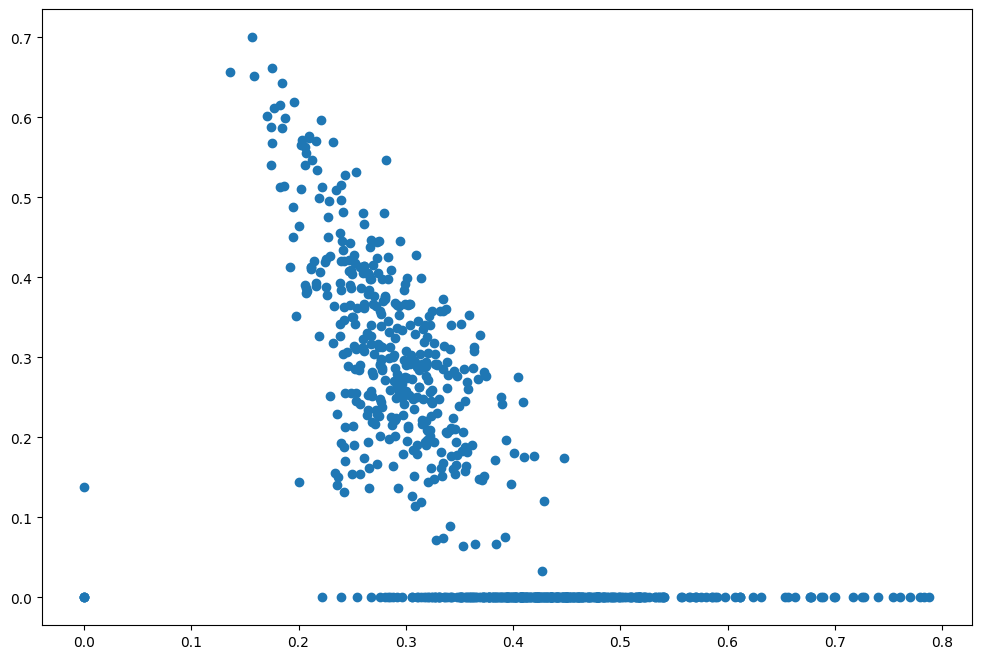

In [15]:
fix, ax = plt.subplots(figsize=(12,8))
plt.scatter(l1_normalized_df['Glucose'],l1_normalized_df['Insulin'])
plt.show()

In [16]:
max_normalized_df = pd.DataFrame(normalize(df, norm='max'), columns=df.columns)

In [17]:
max_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


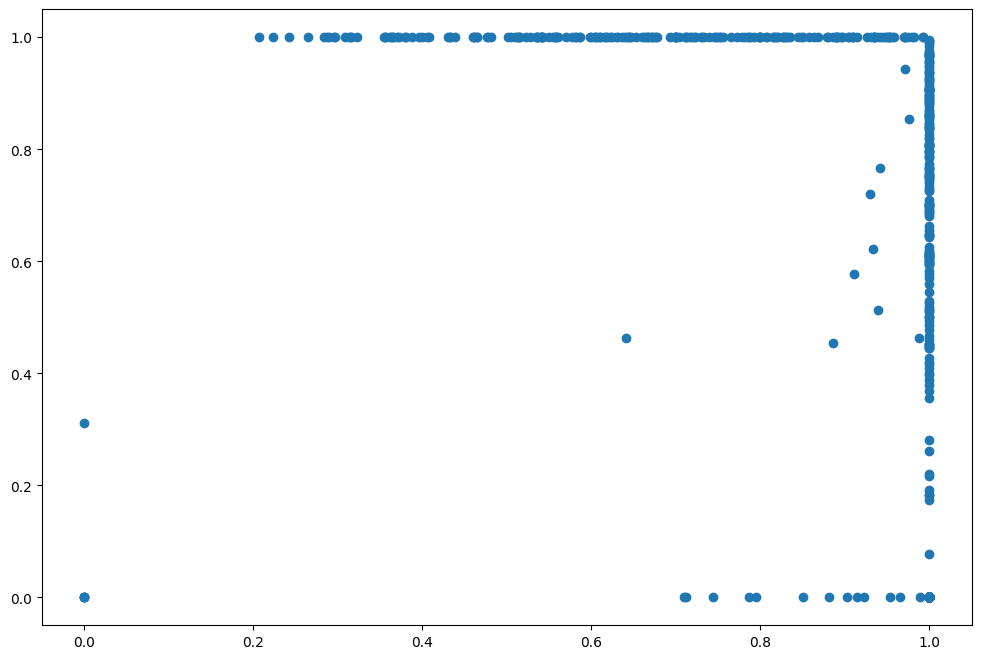

In [18]:
fix, ax = plt.subplots(figsize=(12,8))
plt.scatter(max_normalized_df['Glucose'],max_normalized_df['Insulin'])
plt.show()